In [286]:
# import the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [287]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [288]:
#read the data into the file
dat = pd.read_csv("Country-data.csv")

In [289]:
#see the first few rows of the data
dat.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [290]:
#converting the int type columns to float
dat['income'] = dat['income'].astype(float)
dat['gdpp'] = dat['gdpp'].astype(float)

In [291]:
dat.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


In [292]:
# checking the number of countries
dat['country'].value_counts()

Venezuela                         1
Mauritius                         1
Suriname                          1
Vanuatu                           1
Austria                           1
Jamaica                           1
Hungary                           1
Iraq                              1
Guinea-Bissau                     1
Kiribati                          1
Saudi Arabia                      1
Kenya                             1
Congo, Dem. Rep.                  1
South Korea                       1
Qatar                             1
Russia                            1
Equatorial Guinea                 1
Latvia                            1
Indonesia                         1
Micronesia, Fed. Sts.             1
Tonga                             1
El Salvador                       1
India                             1
Fiji                              1
St. Vincent and the Grenadines    1
Chad                              1
Morocco                           1
Central African Republic    

In [293]:
# number of nulls per column
dat.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [294]:
# we don't need country column for PCA and hence we preserve it so we can drop it later
country = dat['country']

In [295]:
# drop country
dat1 = dat.drop('country', axis=1)

In [296]:
# dat1 info
dat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null float64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null float64
dtypes: float64(9)
memory usage: 11.8 KB


In [297]:
# we need to scale the data before performing PCA
# initializing the scaler object
standard_scaler = StandardScaler()

In [298]:
# performing fit and transform on our data
dat2 = standard_scaler.fit_transform(dat1)
dat2.max()

9.129718055281284

In [299]:
# import the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver = "randomized", random_state = 42)

In [300]:
# perform PCA
pca.fit(dat2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [301]:
# PCA components
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [302]:
# variance explained by the PCA components
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

Text(0, 0.5, 'Cummulative variance')

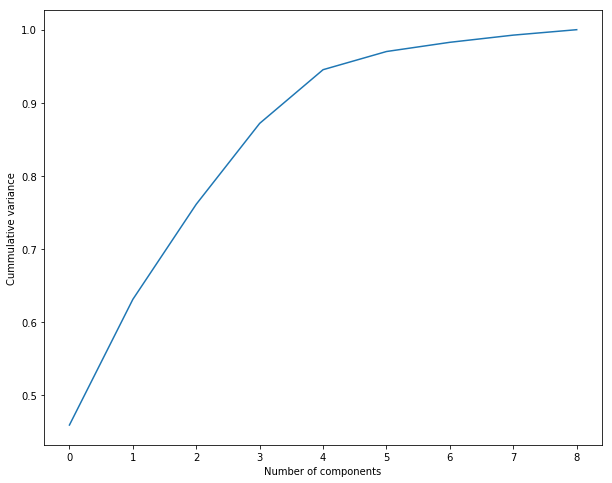

In [303]:
# plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cummulative variance')

In [304]:
# select the number of PCs looking at the scree plot
# PCA : 4

In [305]:
# run the PCA with the components chosen above 
from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components = 4)
df_pca = pca_final.fit_transform(dat2)

In [306]:
df_pca.shape

(167, 4)

In [307]:
# print the resultant PCA
df_pca[:10]

array([[-2.91378654,  0.08835389,  0.72100319,  0.99669898],
       [ 0.42935757, -0.58785899,  0.32105232, -1.1711928 ],
       [-0.28298829, -0.44665717, -1.22513541, -0.850127  ],
       [-2.93096861,  1.69943654, -1.5217345 ,  0.87596644],
       [ 1.0319876 ,  0.13048801,  0.19292243, -0.84480806],
       [ 0.02847002, -1.75672051, -0.79351999, -0.05248639],
       [-0.10284892, -0.56747588, -0.27766885, -1.45832104],
       [ 2.33945555, -1.99811958, -0.23705201,  1.13249032],
       [ 2.97385881, -0.73484947,  0.54842092,  1.19256083],
       [-0.180006  , -0.39375223, -0.86425521, -0.42665661]])

In [308]:
# creating a transpose so that each column is properly arranged
pc = np.transpose(df_pca)

In [309]:
# create dataframe with the PCs obtained
pca_df2 = pd.DataFrame({'PC1': pc[0], 'PC2': pc[1], 'PC3': pc[2], 'PC4': pc[3]})
pca_df2.head()

,PC1,PC2,PC3,PC4
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808


In [310]:
# add the country column back again
pca_df2 = pd.DataFrame({'country': list(country),'PC1' : pc[0],'PC2':pc[1],'PC3' : pc[2],'PC4':pc[3]})
pca_df2.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699
1,Albania,0.429358,-0.587859,0.321052,-1.171193
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127
3,Angola,-2.930969,1.699437,-1.521734,0.875966
4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808


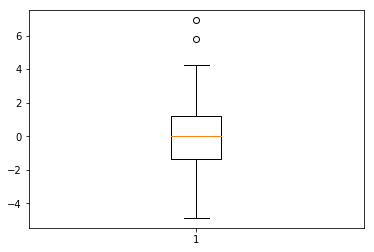

In [311]:
# outlier treatment for clustering purpose
# Inter Quantile Range method
# PC1
plt.boxplot(pca_df2.PC1)
Q1 = pca_df2.PC1.quantile(0.05)
Q3 = pca_df2.PC1.quantile(0.95)
IQR = Q3-Q1
pca_df2 = pca_df2[(pca_df2.PC1>=Q1) & (pca_df2.PC1<=Q3)]

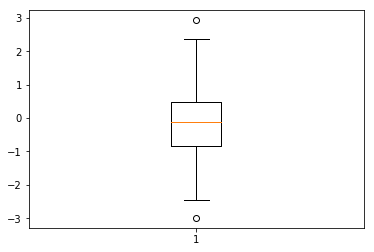

In [312]:
# PC2
plt.boxplot(pca_df2.PC2)
Q1 = pca_df2.PC2.quantile(0.05)
Q3 = pca_df2.PC2.quantile(0.95)
IQR = Q3-Q1
pca_df2 = pca_df2[(pca_df2.PC2>=Q1) & (pca_df2.PC2<=Q3)]

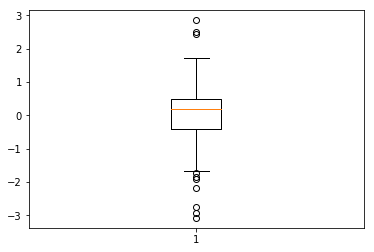

In [313]:
# PC3
plt.boxplot(pca_df2.PC3)
Q1 = pca_df2.PC3.quantile(0.05)
Q3 = pca_df2.PC3.quantile(0.95)
IQR = Q3-Q1
pca_df2 = pca_df2[(pca_df2.PC3>=Q1) & (pca_df2.PC3<=Q3)]

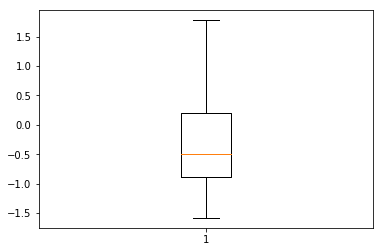

In [314]:
# PC4
plt.boxplot(pca_df2.PC4)
Q1 = pca_df2.PC4.quantile(0.05)
Q3 = pca_df2.PC4.quantile(0.95)
IQR = Q3-Q1
pca_df2 = pca_df2[(pca_df2.PC4>=Q1) & (pca_df2.PC4<=Q3)]

In [315]:
# Hopkins analysis
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0
 
    return H

hopkins(pca_df2.drop('country', axis=1))

0.6755616157676163

In [316]:
# performing clustering we need to drop country column
dat3_1 = pca_df2.drop('country', axis = 1)
dat3_1.head()

,PC1,PC2,PC3,PC4
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
4,1.031988,0.130488,0.192922,-0.844808
5,0.028470,-1.756721,-0.793520,-0.052486


In [317]:
# silhouette score analysis
from sklearn.metrics import silhouette_score

ss = []
for k in range (4,10):
    kmeans = KMeans(n_clusters = k).fit(dat3_1)
    ss.append([k, silhouette_score(dat3_1, kmeans.labels_)])    

In [318]:
ss

[[4, 0.3000608250809768],
 [5, 0.29825401021110803],
 [6, 0.31957774847333187],
 [7, 0.2941386239250826],
 [8, 0.30238006708229626],
 [9, 0.26066966513571244]]

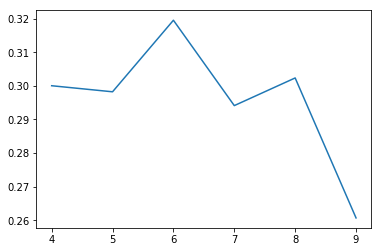

In [319]:
# plot the silhouette score
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

In [320]:
# selecting the maximum peak
# 7

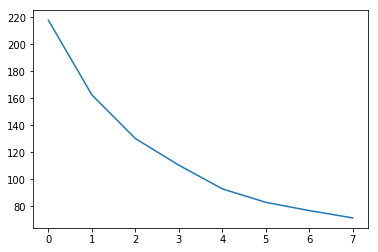

In [321]:
# elbow curve method
ssd = []
for k in list(range(2,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(dat3_1)
    ssd.append(model.inertia_)
plt.plot(ssd)

In [322]:
# let's perform the k-means clustering using k = 4
model_clus2 = KMeans(n_clusters = 4, max_iter = 50, random_state = 50)
model_clus2.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [323]:
# lets add country to the PCs of data
dat_km = pd.concat([pca_df2.reset_index().drop('index', axis = 1), pd.Series(model_clus2.labels_)], axis =1)

In [324]:
# columns
dat_km.columns = ['country', 'PC1', 'PC2','PC3','PC4','clusterID']
dat_km.head()

,country,PC1,PC2,PC3,PC4,clusterID
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699,0
1,Albania,0.429358,-0.587859,0.321052,-1.171193,2
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127,3
3,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808,2
4,Argentina,0.028470,-1.756721,-0.793520,-0.052486,3


In [325]:
# check the count of observations per cluster
dat_km['clusterID'].value_counts()

2    36
0    27
3    24
1    20
Name: clusterID, dtype: int64

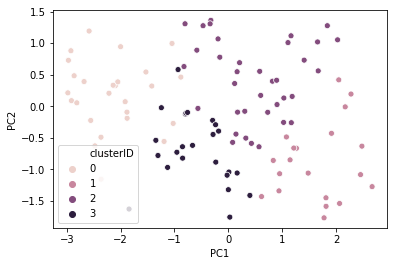

In [326]:
# plot the clusters with respect to the clusters obtained
sns.scatterplot(x='PC1', y='PC2', hue = 'clusterID', legend = 'full', data = dat_km)

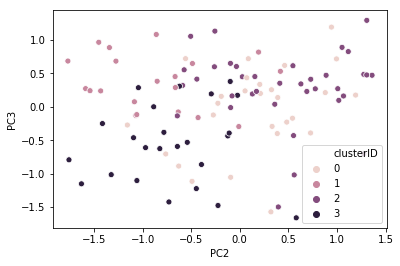

In [327]:

sns.scatterplot(x='PC2', y='PC3', hue = 'clusterID', legend = 'full', data = dat_km)

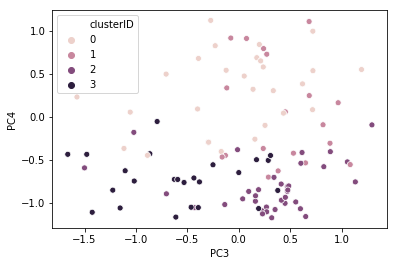

In [328]:

sns.scatterplot(x='PC3', y='PC4', hue = 'clusterID', legend = 'full', data = dat_km)

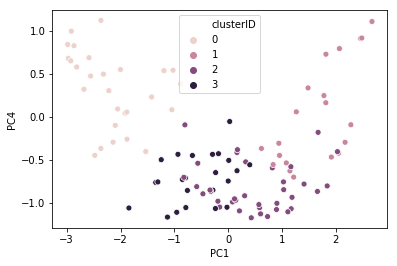

In [329]:

sns.scatterplot(x='PC1', y='PC4', hue = 'clusterID', legend = 'full', data = dat_km)

In [330]:
# profiling clusters
# merge the orginial data with the data clusterID
dat5 = pd.merge(dat, dat_km, how = 'inner', on = 'country')
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,clusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,-2.913787,0.088354,0.721003,0.996699,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0.429358,-0.587859,0.321052,-1.171193,2
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,-0.282988,-0.446657,-1.225135,-0.850127,3
3,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1.031988,0.130488,0.192922,-0.844808,2
4,Argentina,14.5,18.9,8.10,16.0,18700.0,20.90,75.8,2.37,10300.0,0.028470,-1.756721,-0.793520,-0.052486,3


In [331]:
# drop PCs from the clusters
dat5.drop(['PC1','PC2','PC3','PC4'], axis=1, inplace=True)
dat5.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,3
3,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,2
4,Argentina,14.5,18.9,8.10,16.0,18700.0,20.90,75.8,2.37,10300.0,3


In [332]:
# analysis of the clusters
child_mort = dat5.groupby(['clusterID']).child_mort.mean()
income = dat5.groupby(['clusterID']).income.mean()
gdpp = dat5.groupby(['clusterID']).gdpp.mean()
clusterid = dat5['clusterID']

In [333]:
# concat the resultant with the cluster id columns
df = pd.concat([child_mort,income,gdpp,clusterid], axis=1)

In [334]:
df.head()

,child_mort,income,gdpp,clusterID
0,77.222222,4145.111111,2005.925926,0
1,6.225000,26830.000000,24355.500000,2
2,18.633333,13039.166667,6769.888889,3
3,33.012500,9610.833333,4175.666667,2
4,NaN,NaN,NaN,3


In [335]:
# finding observations that belong to certain cluster
dat5[dat5['clusterID']==1]['country']

6             Bahamas
9            Barbados
19              Chile
21         Costa Rica
23            Croatia
24             Cyprus
25     Czech Republic
33            Finland
37            Germany
39             Greece
45            Iceland
50             Israel
72        New Zealand
78             Poland
79           Portugal
84             Serbia
86           Slovenia
89        South Korea
101    United Kingdom
102           Uruguay
Name: country, dtype: object

In [336]:
# Heirarchichal clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

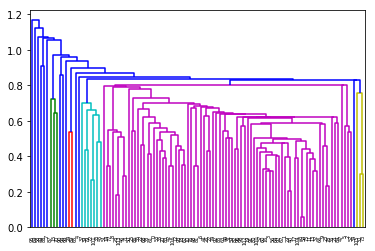

In [337]:
# single linkage
pca_df2 = pca_df2.drop('country', axis=1)
mergings = linkage(pca_df2, method = "single", metric = "euclidean")
dendrogram(mergings)
plt.show()

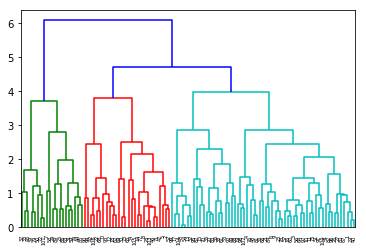

In [338]:
# complete linkage
mergings = linkage(pca_df2, method = "complete", metric = "euclidean")
dendrogram(mergings)
plt.show()

In [339]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters = 3).reshape(-1, )
cluster_labels

array([0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 2, 2, 1, 1, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 0, 1,
       2, 2, 0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 1, 0,
       1, 1, 0, 0, 1, 0, 2, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0])

In [340]:
# assign cluster labels
pca_df2['cluster_labels_HC'] = cluster_labels
pca_df2.head()

,PC1,PC2,PC3,PC4,cluster_labels_HC
0,-2.913787,0.088354,0.721003,0.996699,0
1,0.429358,-0.587859,0.321052,-1.171193,1
2,-0.282988,-0.446657,-1.225135,-0.850127,0
4,1.031988,0.130488,0.192922,-0.844808,1
5,0.028470,-1.756721,-0.793520,-0.052486,1


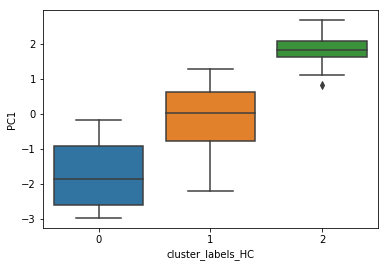

In [342]:
# plot this
sns.boxplot(x='cluster_labels_HC', y='PC1', data=pca_df2)

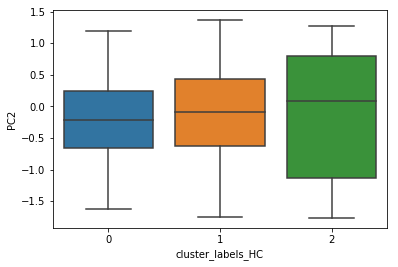

In [343]:
sns.boxplot(x='cluster_labels_HC', y='PC2', data=pca_df2)

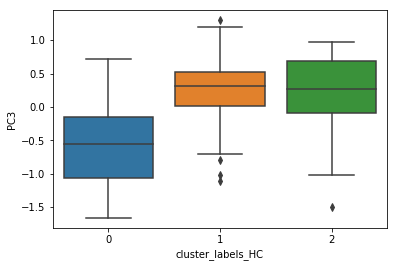

In [344]:
sns.boxplot(x='cluster_labels_HC', y='PC3', data=pca_df2)

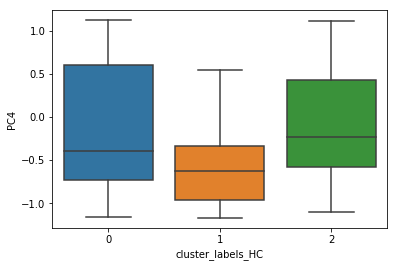

In [345]:
sns.boxplot(x='cluster_labels_HC', y='PC4', data=pca_df2)